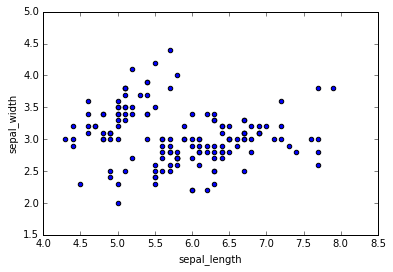

In [1]:
import traceback,logging,os,signal,time,gzip,StringIO,logging.handlers,re,sys,requests, random, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

config = dict()
config['resource_dir'] = "../resources/"
config['raw_file'] = config['resource_dir'] + "iris.data.csv"

iris_df = pd.read_csv(config['raw_file'],header=None)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
#print iris_df
iris_df.plot.scatter(x='sepal_length',y='sepal_width')

In [2]:
# Picking out a random new point
idx = int(len(iris_df) * random.uniform(0,1.0)) 
new_pt = iris_df.iloc[idx]
iris_df.drop(iris_df.index[[idx]], inplace=True)
new_pt


sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.1
class           Iris-setosa
Name: 9, dtype: object

In [27]:
def getDiff(y2, y1, x2, x1):
    return np.sqrt((y2 - y1)**2 + (x2-x1)**2)

iris_df['diff'] = iris_df.apply(lambda x: getDiff(x['sepal_width'],new_pt['sepal_width'],x['sepal_length'],new_pt['sepal_length']), axis =1)
iris_df.sort_values(by="diff",inplace=True)
iris_df = iris_df.iloc[:10]
majority_class = iris_df['class'].value_counts()[0]

Iris-setosa    10
Name: class, dtype: int64